In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC


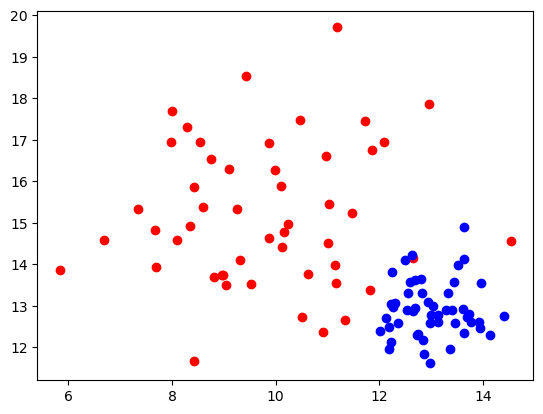

In [33]:
mu_x_1 = 13.0  # Пример координаты x
mu_y_1 = 13.0  # Пример координаты y
sigma_1 = 0.7  # Можно изменить на другое значение по вашему усмотрению
mu_x_2 = 10  # Пример координаты x
mu_y_2 = 15  # Пример координаты y
sigma_2 = 1.8  # Можно изменить на другое значение по вашему усмотрению
num_samples_1 = 50  # Количество шумовых точек
num_samples_2 = 50
x1 = np.random.normal(mu_x_1, sigma_1, num_samples_1)
y1 = np.random.normal(mu_y_1, sigma_1, num_samples_1)
x2 = np.random.normal(mu_x_2, sigma_2, num_samples_2)
y2 = np.random.normal(mu_y_2, sigma_2, num_samples_2)

X = np.array(list(zip(np.concatenate([x1,x2]) , np.concatenate([y1,y2]))))
y = np.concatenate([np.zeros(num_samples_1), np.ones(num_samples_2)] ) 

plt.scatter(x2 ,y2 , color='red')
plt.scatter(x1 ,y1 , color='blue')
plt.show()

In [44]:
# def custom_kernel(X, Y):
#     return np.dot(X, Y.T)
# gram_matrix = custom_kernel(X, X)
# print(gram_matrix)

[[348.35060692 341.58328607 348.96337529 ... 294.44636758 320.7178764
  348.88832151]
 [341.58328607 335.24821738 342.05122121 ... 290.83645091 316.56465048
  345.294169  ]
 [348.96337529 342.05122121 349.63596831 ... 294.03172368 320.36400273
  348.09506756]
 ...
 [294.44636758 290.83645091 294.03172368 ... 263.68802527 285.66315409
  317.23617879]
 [320.7178764  316.56465048 320.36400273 ... 285.66315409 309.62320479
  343.19960068]
 [348.88832151 345.294169   348.09506756 ... 317.23617879 343.19960068
  383.12335109]]


In [43]:
# Обучение SVM , ядра: 'linear', 'precomputed', 'sigmoid', 'rbf', 'poly'
svm = SVC(kernel='precomputed', degree=3, C=1.0)
svm.fit(gram_matrix, y)

# Создание сетки для построения графика
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))

# Предсказание классов для каждой точки на сетке
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Построение графика с разделяющей линией и двумя областями
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x1, y1, c='red', label='Класс 1')
plt.scatter(x2, y2, c='blue', label='Класс 2')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.legend()
plt.title('SVM с полиномиальным ядром')
plt.show()

ValueError: X has 2 features, but SVC is expecting 100 features as input.